```
Student-1
Name: A. M. Rafinul Huq
ID: 21 -45668-3
```

```
Student-2
Name: YEASIR AHNAF ASIF
ID: 20-42815-1
```



*   Mount your google drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import all necessary libraries.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
path = '/content/drive/My Drive/telco_churn.csv'
data = pd.read_csv(path)
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:

data.info()


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


data.drop_duplicates(inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-14-dba8d43293df>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

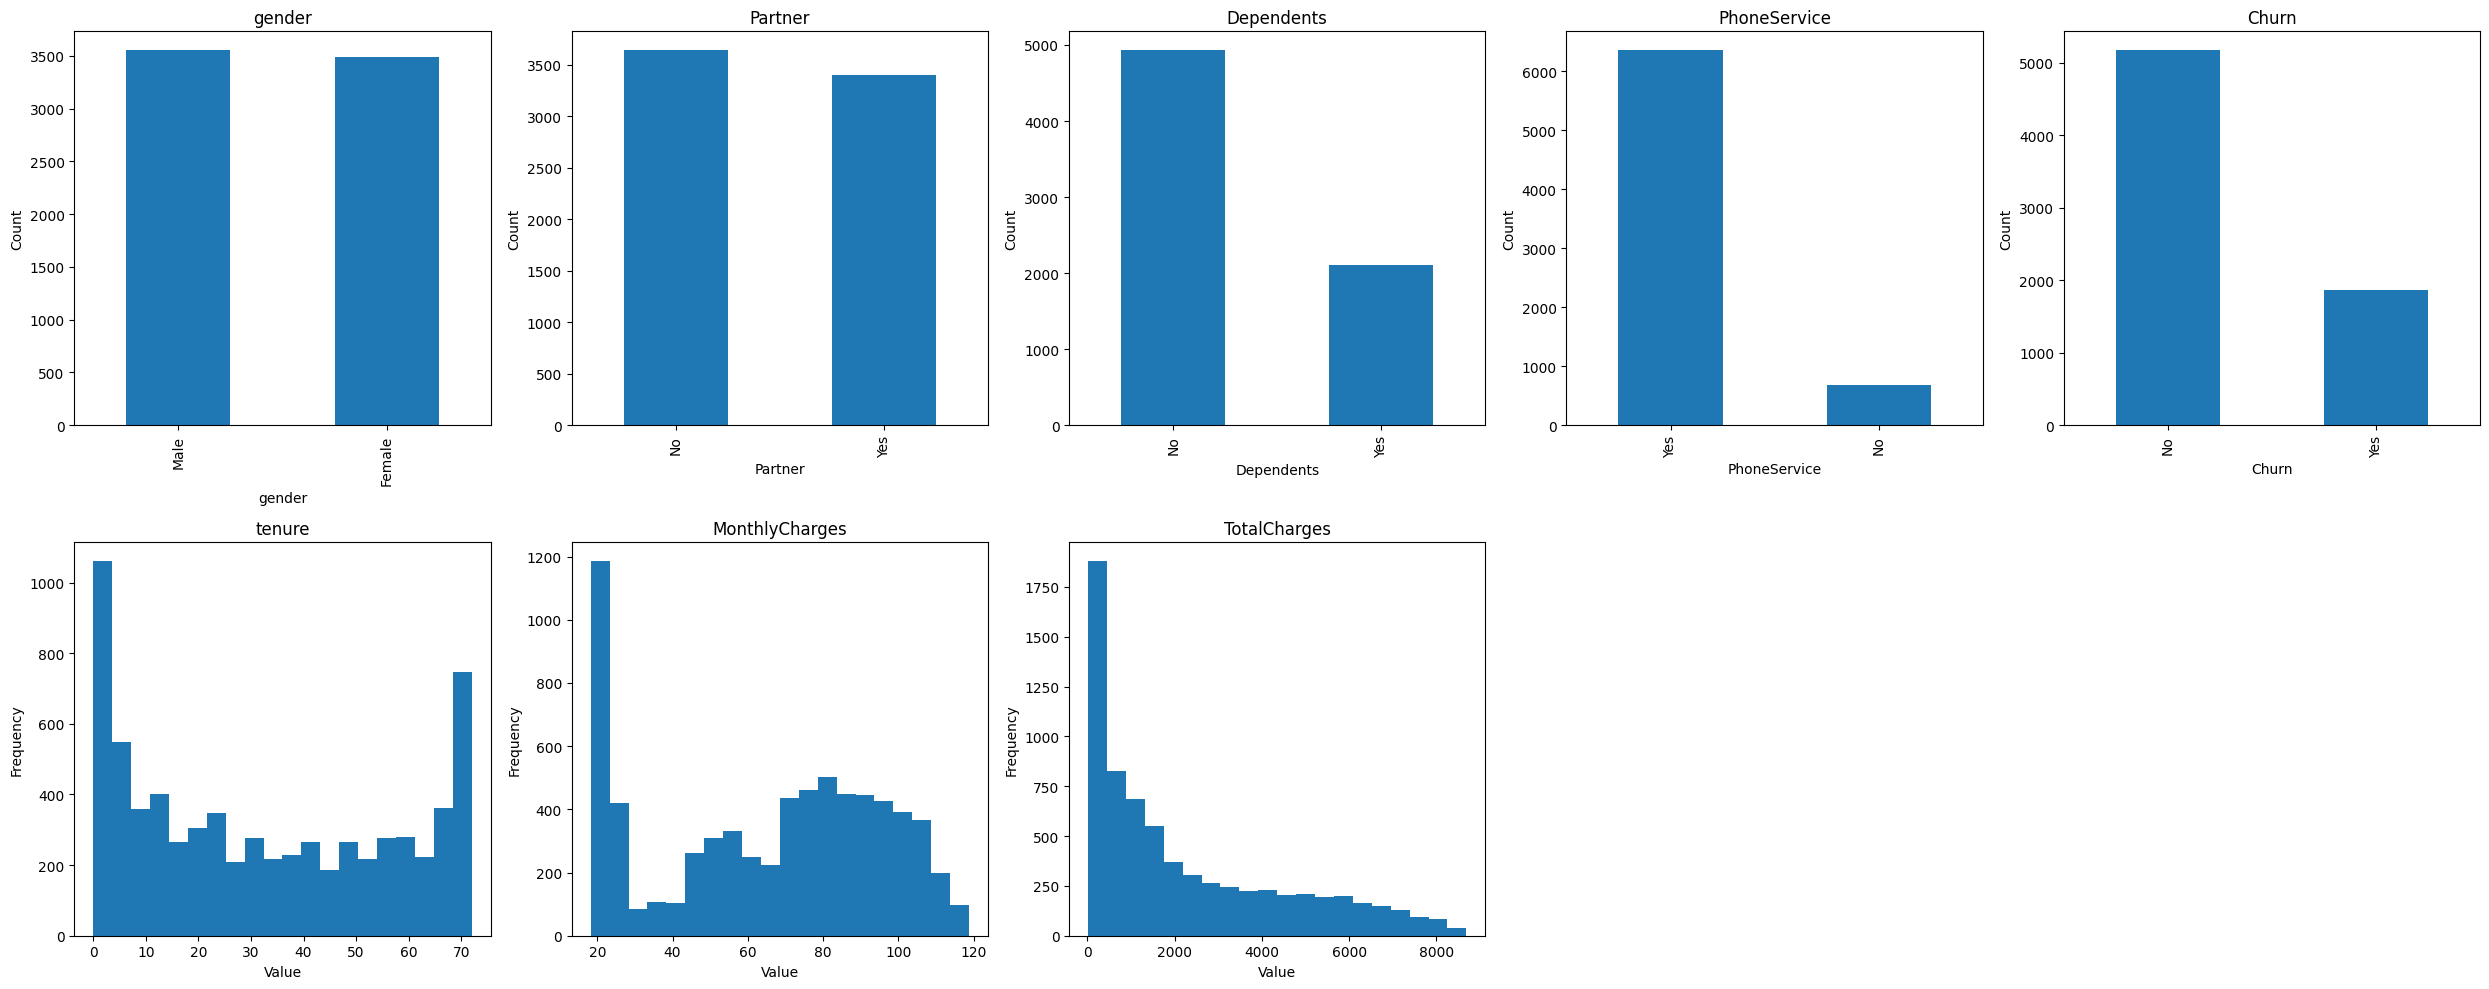

In [ ]:

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'Churn']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 5, figsize=(25, 10))


for i, feature in enumerate(categorical_features):
    ax = axes[0, i]
    data[feature].value_counts().plot(kind='bar', ax=ax, title=feature)
    ax.set_ylabel("Count")


for i, feature in enumerate(numerical_features):
    ax = axes[1, i]
    data[feature].plot(kind='hist', bins=20, ax=ax, title=feature)
    ax.set_xlabel("Value")

for j in range(len(categorical_features), 5):
    fig.delaxes(axes[0, j])
for j in range(len(numerical_features), 5):
    fig.delaxes(axes[1, j])

plt.tight_layout()
plt.show()


•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [ ]:

label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'customerID':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le


scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,5575-GNVDE,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,3668-QPYBK,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,7795-CFOCW,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,9237-HQITU,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.940470,1


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [ ]:

X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3241)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 19), (1409, 19), (5634,), (1409,))

•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:

svm_classifier = SVC(kernel='linear', random_state=3241)

svm_classifier.fit(X_train, y_train)


y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy (Default Parameters):", train_accuracy)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

grid_search = GridSearchCV(SVC(random_state=3241), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters from GridSearch:", best_params)

best_svm_classifier = grid_search.best_estimator_
best_svm_classifier.fit(X_train, y_train)



NameError: name 'SVC' is not defined

•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

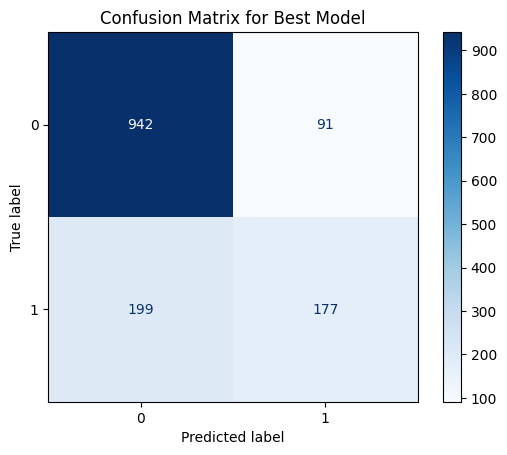

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       376

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:

y_test_pred = best_svm_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svm_classifier.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Best Model")
plt.show()


print("Classification Report:\n", classification_report(y_test, y_test_pred))

•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [ ]:
train_accuracy_tuned = accuracy_score(y_train, best_svm_classifier.predict(X_train))
test_accuracy_tuned = accuracy_score(y_test, y_test_pred)

print("Training Accuracy with Tuned Parameters:", train_accuracy_tuned)
print("Testing Accuracy with Tuned Parameters:", test_accuracy_tuned)


accuracy_difference = abs(train_accuracy_tuned - test_accuracy_tuned)
print("Accuracy Difference:", accuracy_difference)

Training Accuracy with Tuned Parameters: 0.8225062122825701
Testing Accuracy with Tuned Parameters: 0.794180269694819
Accuracy Difference: 0.02832594258775112
